In [6]:
from quantumthreattracker.lifespan_estimator import HardwareRoadmap

hardware_roadmap = HardwareRoadmap()


for i in range(20):
    max_qubits = 1000 * (2**i)
    error_rate = 1e-3 * 0.8**i
    measurement_time = str(100 * 0.9**i) + " ns"
    gate_time = str(50 * 0.9**i) + " ns"
    params = {
        "qubitParams": {
            "name": "Custom",
            "instructionSet": "GateBased",
            "oneQubitMeasurementTime": measurement_time,
            "oneQubitGateTime": gate_time,
            "twoQubitGateTime": gate_time,
            "tGateTime": gate_time,
            "oneQubitMeasurementErrorRate": error_rate,
            "oneQubitGateErrorRate": error_rate,
            "twoQubitGateErrorRate": error_rate,
            "tGateErrorRate": error_rate,
        },
        "constraints": {
            "maxPhysicalQubits": max_qubits
        }
    }
    hardware_roadmap.add(timestamp=1735689600 + 31536000 * 2 * i, estimator_params=params)

# hardware_roadmap.as_list()

In [7]:
from quantumthreattracker.lifespan_estimator import LifespanEstimator

lifespan_estimator = LifespanEstimator(hardware_roadmap)

In [8]:
protocols = [
    {"algorithm": "RSA", "keySize": 1024},
    {"algorithm": "RSA", "keySize": 2048},
    ]

In [9]:
lifespan_estimator.generate_report(protocols=protocols)

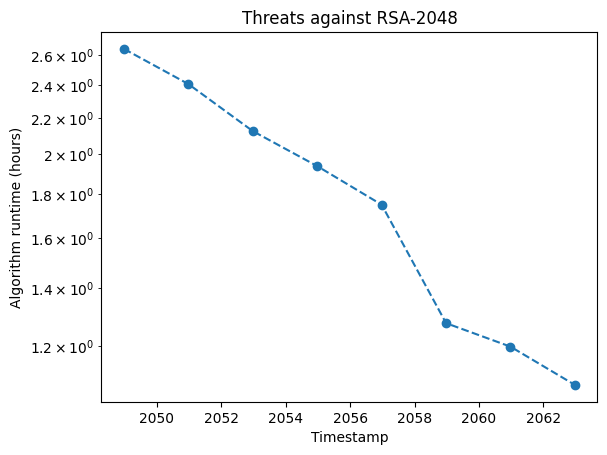

In [12]:
import matplotlib.pyplot as plt

ax = lifespan_estimator.plot_threats(protocol="RSA-2048")
plt.show()